In [130]:
"""
Otus, курс Data Scientist, старт дек.2018
Задание к уроку N1

Этап 2.

Черновик для выполнения задания.
"""

'\nOtus, курс Data Scientist, старт дек.2018\nЗадание к уроку N1\n\nЭтап 2.\n\nЧерновик для выполнения задания.\n'

In [131]:
"""
Вопросы, на которые ищем ответ - копируем из части 1.

Вопрос N1:
Существует ли попарная корелляция между значениями в столбцах: views_count, comments_count, reposts_count, likes_count ?

Вопрос N2:
Существует ли корелляция между comments_count, reposts_count, likes_count?
То есть, возможно ли снизить размерность, если введем свойство "интерес к публикации" вместо этих 3-х столбцов?
Возможно, стоит добавить отношение к кол-ву просмотров? Пусть это будет второй вариант оценки "интерес к публикации".

Вопрос N3:
В каких сообществах сообщения вызывают наибольший интерес?
"""

'\nВопросы, на которые ищем ответ - копируем из части 1.\n\nВопрос N1:\nСуществует ли попарная корелляция между значениями в столбцах: views_count, comments_count, reposts_count, likes_count ?\n\nВопрос N2:\nСуществует ли корелляция между comments_count, reposts_count, likes_count?\nТо есть, возможно ли снизить размерность, если введем свойство "интерес к публикации" вместо этих 3-х столбцов?\nВозможно, стоит добавить отношение к кол-ву просмотров? Пусть это будет второй вариант оценки "интерес к публикации".\n\nВопрос N3:\nВ каких сообществах сообщения вызывают наибольший интерес?\n'

In [132]:
# Найдем ответ на вопрос N1

In [133]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime
from datetime import date

In [134]:
# константы, которые используем
RESULTS_FILE_NAME = 'result.csv' # название файла с данными

In [135]:
df = pd.read_csv(RESULTS_FILE_NAME)
df.head()

,group_id,comments_count,date,likes_count,marked_as_ads,post_source,reposts_count,text,views_count
0,29387592,1,1549998127,1,0,vk,0,Состоялся долгожданный релиз мобильного прилож...,893.0
1,29387592,0,1549997035,4,0,vk,0,Исследовательская компания Diar опубликовала н...,1186.0
2,29387592,3,1549896060,4,0,vk,0,"Торговая P2P-платформа Localbitcoins заявила, ...",2285.0
3,29387592,9,1549634023,7,0,vk,0,Тогда курс первой криптовалюты достигал отметк...,2328.0
4,29387592,0,1549454503,6,0,vk,3,Исследователи канадской финансовой компании Ca...,2727.0


In [136]:
# для удобства - создадим столбец, который представляет дату в виде "номер дня начиная от date0"
date_start = datetime(2018, 12, 1)
df['day_number'] = df['date'].apply(lambda x: (datetime.fromtimestamp(int(x)) - date_start).days)
df.head()

,group_id,comments_count,date,likes_count,marked_as_ads,post_source,reposts_count,text,views_count,day_number
0,29387592,1,1549998127,1,0,vk,0,Состоялся долгожданный релиз мобильного прилож...,893.0,73
1,29387592,0,1549997035,4,0,vk,0,Исследовательская компания Diar опубликовала н...,1186.0,73
2,29387592,3,1549896060,4,0,vk,0,"Торговая P2P-платформа Localbitcoins заявила, ...",2285.0,72
3,29387592,9,1549634023,7,0,vk,0,Тогда курс первой криптовалюты достигал отметк...,2328.0,69
4,29387592,0,1549454503,6,0,vk,3,Исследователи канадской финансовой компании Ca...,2727.0,67


In [137]:
# введем новый dataframe, который используем для ответа на вопрос N1
df_1 = df[['comments_count','likes_count','reposts_count','views_count']].copy()

In [138]:
# отобразим корреляцию
df_1.corr()
# результат наблюдений - это ответ на Вопрос N1

,comments_count,likes_count,reposts_count,views_count
comments_count,1.000000,0.323684,0.363685,0.329841
likes_count,0.323684,1.000000,0.948875,0.738771
reposts_count,0.363685,0.948875,1.000000,0.524269
views_count,0.329841,0.738771,0.524269,1.000000


In [139]:
"""
Ответ на вопрос N1

Корреляция есть:
likes_count, reposts_count - 0,95. Оценим, это как сильная корреляция
likes_count, views_count - 0,74. Назовем: средняя
reposts_count, views_count - 0,52. Назовем: необязательная.
"""

'\nОтвет на вопрос N1\n\nКорреляция есть:\nlikes_count, reposts_count - 0,95. Оценим, это как сильная корреляция\nlikes_count, views_count - 0,74. Назовем: средняя\nreposts_count, views_count - 0,52. Назовем: необязательная.\n'

In [140]:
# Ищем ответ на вопрос N2

In [141]:
# введем величину: кол-во лайков на 1 репост
def likes_per_repost_func(row):
    return 1.0*row['likes_count'] / row['reposts_count']

# создадим новый dataframe, с новым столбцом
df_2 = df[df['reposts_count'] > 0].copy() # т.к. будет деление на кол-во репостов - исключаем строки где репостов нет
df_2['likes_per_repost'] = df_2.apply(likes_per_repost_func, axis=1)

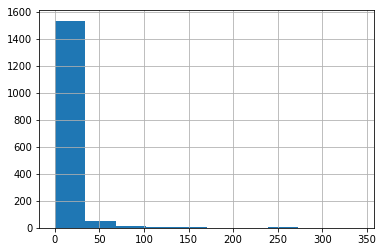

In [142]:
# посмотрим на распределение
df_2['likes_per_repost'].hist()

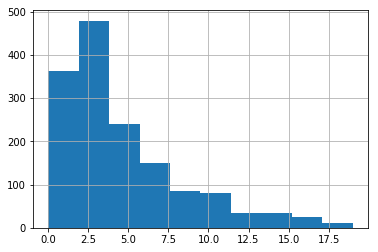

In [144]:
# найдем, сколько нужно отбросить крайних значений, чтобы распределение стало похожим на классическое
quantile = 0.93 # подбираем это значение
columnName = 'likes_per_repost'
barrier = df_2[columnName].quantile(quantile) # проходное значение. Все, что за пределами - отбросим
df_2_tmp = df_2[df_2[columnName] < barrier].copy()
df_2_tmp['likes_per_repost'].hist()
# результат наблюдений - если ввести строгий коэффициент k такой что кол-во лайков = k * кол-во репостов,
#   тогда погрешность будет весьма большой, т.к. значения сильно распределены (см.chart)

In [145]:
"""
Ответ на вопрос N2

Корреляция существует между likes_count, reposts_count.
Но, comments_count - является относительно независимой величиной и ее лучше рассматривать отдельно.
Ввести величину "интерес к публикации" - возможно.
Но, для точных коэффициентов, с которыми вносить лайки и репосты - требуется дополнительное исследование.
"""

'\nОтвет на вопрос N2\n\nКорреляция существует между likes_count, reposts_count.\nНо, comments_count - является относительно независимой величиной и ее лучше рассматривать отдельно.\nВвести величину "интерес к публикации" - возможно.\nНо, для точных коэффициентов, с которыми вносить лайки и репосты - требуется дополнительное исследование.\n'

In [146]:
# найдем ответ на вопрос N3

In [147]:
# введем dataframe, который используем для поиска ответа на вопрос N3
df_3 = df.copy()

In [148]:
# введем величину, которую считаем "интерес к публикации"
K_COMMENTS = 1.0 # коэффициент, с которым вносим комментарий
K_LIKES = 1.0 # коэффициент, с которым вносим лайки
K_REPOSTS = 1.0  # коэффициент, с которым вносим репосты
def interest_func(row):
    return K_COMMENTS * row['comments_count'] + K_LIKES * row['likes_count'] + K_REPOSTS * row['reposts_count']

In [149]:
# создаем новый столбец
df_3['interest_rate'] = df_3.apply(interest_func, axis=1)
# удалим записи, где интерес = 0 - они нас не интересуют
df_3 = df_3[df_3['interest_rate'] > 0]

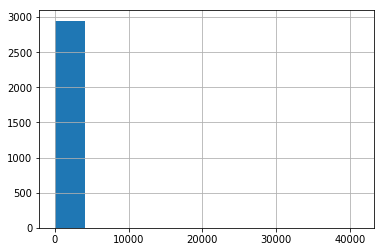

In [150]:
# посмотрим распределение
df_3['interest_rate'].hist()
# по наблюдению - стоит раздельно расмотреть строки: которые рядом с медианой, и которые выше некоторой квантили

In [151]:
# будем подбирать эти значение
QUANTILE_LOW = 0.85 # меньше этого значения - слабый интерес, выше - интерес есть
QUANTILE_HIGH = 0.97 # выше этого значения - выброс. То есть, накрутка или что-либо еще.

# разделяем
columnName = 'interest_rate'
barrier_low = df_3[columnName].quantile(QUANTILE_LOW) # в виде числа
barrier_high = df_3[columnName].quantile(QUANTILE_HIGH) # в виде числа
df_3_minor = df_3[df_3[columnName] < barrier_low].copy()
df_tmp = df_3[df_3[columnName] >= barrier_low].copy()
df_3_target = df_tmp[df_tmp[columnName] < barrier_high].copy()
df_3_untrust = df_tmp[df_tmp[columnName] >= barrier_high].copy()

count    2507.000000
mean        7.717192
std         6.807128
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        32.000000
Name: interest_rate, dtype: float64

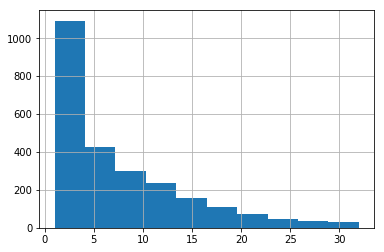

In [152]:
df_3_minor['interest_rate'].hist()
df_3_minor['interest_rate'].describe()

count    357.000000
mean      78.414566
std       48.257579
min       33.000000
25%       43.000000
50%       56.000000
75%      108.000000
max      202.000000
Name: interest_rate, dtype: float64

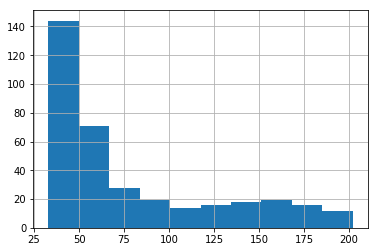

In [153]:
df_3_target['interest_rate'].hist()
df_3_target['interest_rate'].describe()

count       89.000000
mean      1251.955056
std       4570.634236
min        203.000000
25%        262.000000
50%        364.000000
75%        603.000000
max      41217.000000
Name: interest_rate, dtype: float64

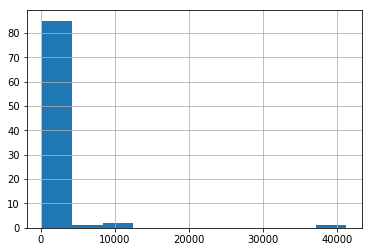

In [154]:
df_3_untrust['interest_rate'].hist()
df_3_untrust['interest_rate'].describe()

In [155]:
# теперь найдем сообщества, в которых чаще всего встречаются сообщения из целевой группы
df_3_grouped = df_3_target.groupby('group_id').first() # создаем dataframe с уникальными group_id
df_3_grouped['count'] = df_3_target['group_id'].value_counts() # проставляем кол-во, сколько раз встречается
series_3_top = df_3_grouped['count'].sort_values(ascending=False)

In [156]:
# выводим результат
series_3_top.head()

group_id
122422421    84
158943684    61
43011371     27
93604475     23
53986544     19
Name: count, dtype: int64

In [157]:
"""
Ответ на вопрос N3

Мы определили, в каких сообществах встречается более всего публикаций, которые вызывают интерес у посетителей
"""

'\nОтвет на вопрос N3\n\nМы определили, в каких сообществах встречается более всего публикаций, которые вызывают интерес у посетителей\n'